# Which one is a better plan?

The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants us to know which of the plans brings in more revenue in order to adjust the advertising budget.

I'm going to carry out a preliminary analysis of the plans based on a relatively small client selection. I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. my job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

the purpose of the project to test 2 hypotheses about which of the plans brings in more revenue 
we will use the data to test the hypotheses <br>
**Test two hypotheses:**<br>
the average revenue from users of the Ultimate and Surf calling plans equal.<br>
the average revenue from users in the NY-NJ area is different from that of the users from the other regions



## Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math



## Load data

In [2]:
#Load the data files into different DataFrames
try:
    megaline_calls = pd.read_csv('/datasets/megaline_calls.csv',parse_dates=['call_date'])
    megaline_internet = pd.read_csv('/datasets/megaline_internet.csv',parse_dates=['session_date'])
    megaline_messages = pd.read_csv('/datasets/megaline_messages.csv',parse_dates=['message_date'])
    megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
    megaline_users = pd.read_csv('/datasets/megaline_users.csv',parse_dates=['reg_date','churn_date'])
except: 
    megaline_calls = pd.read_csv(r'C:/Users/Alar/Downloads/megaline_calls.csv',parse_dates=['call_date'])
    megaline_internet = pd.read_csv(r'C:/Users/Alar/Downloads/megaline_internet.csv',parse_dates=['session_date'])
    megaline_messages = pd.read_csv(r'C:/Users/Alar/Downloads/megaline_messages.csv',parse_dates=['message_date'])
    megaline_plans = pd.read_csv(r'C:/Users/Alar/Downloads/megaline_plans.csv')
    megaline_users = pd.read_csv(r'C:/Users/Alar/Downloads/megaline_users.csv',parse_dates=['reg_date','churn_date'])

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
megaline_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**the table plans include informathion about each plan, we have information about the prices for each plan and what is the limits for messages, MB and minutes for each plan** 

## Fix data

In [5]:
megaline_plans.rename(columns = {'plan_name':'plan'}, inplace = True)

In [6]:
megaline_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Users

In [7]:
# Print the general/summary information about the users' DataFrame
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
megaline_users.head(20)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


**users table include information about each user, there name, last name, age, city, and which plan they have 
finally we the churn_ date column we have to check this column, i think this column has missing values because there is no date for alot of users and i think the reason behaind that is the users still active users**

### Fix Data

first i want to check if there is any duplicate data 

In [9]:
megaline_users.duplicated().sum()

0

In [10]:
megaline_users['churn_date'] =megaline_users['churn_date'].fillna('00')

In [11]:
megaline_users['churn_date'].value_counts().sort_values()

2018-10-22 00:00:00      1
2018-09-07 00:00:00      1
2018-12-30 00:00:00      1
2018-10-07 00:00:00      1
2018-11-24 00:00:00      1
2018-11-11 00:00:00      1
2018-12-12 00:00:00      1
2018-12-27 00:00:00      1
2018-11-29 00:00:00      1
2018-12-22 00:00:00      1
2018-11-30 00:00:00      1
2018-07-31 00:00:00      1
2018-10-13 00:00:00      1
2018-10-03 00:00:00      1
2018-09-18 00:00:00      1
2018-08-16 00:00:00      1
2018-12-26 00:00:00      1
2018-09-01 00:00:00      1
2018-11-21 00:00:00      1
2018-08-19 00:00:00      1
2018-12-10 00:00:00      1
2018-09-17 00:00:00      1
2018-11-18 00:00:00      1
2018-12-15 00:00:00      1
2018-11-16 00:00:00      1
2018-12-19 00:00:00      2
2018-11-14 00:00:00      2
2018-12-31 00:00:00      2
2018-12-18 00:00:00      3
00                     466
Name: churn_date, dtype: int64

## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame

megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
megaline_calls.head(20)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


**here we can see that in the table we have many rows for the same user_id for every call they made, I grouped by the user_id and the month and then count for each month the minutes they made**

### Fix data

**as we see in the duration columns there is some 0.0 values i thinks those values is calls that was for several seconds**

In [14]:
megaline_calls.duplicated().sum()

0

### Enrich data

In [15]:
megaline_calls['duration'] =np.ceil(megaline_calls['duration'])
megaline_calls['duration']

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64

**as we know Megaline rounds secounds up to minutes so i rounded up the duration column**

In [16]:
megaline_calls['month'] = megaline_calls['call_date'].astype('datetime64[M]')

In [17]:
group_megaline_calls = megaline_calls.groupby(['user_id','month'])['duration'].sum().reset_index()
group_megaline_calls

,user_id,month,duration
0,1000,2018-12-01,124.0
1,1001,2018-08-01,182.0
2,1001,2018-09-01,315.0
3,1001,2018-10-01,393.0
4,1001,2018-11-01,426.0
...,...,...,...
2253,1498,2018-12-01,339.0
2254,1499,2018-09-01,346.0
2255,1499,2018-10-01,385.0
2256,1499,2018-11-01,308.0


## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame
megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
# Print a sample of data for messages
megaline_messages.head(20)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


**megaline_messages show us the date that every user send a message**

### Fix data

In [20]:
megaline_messages.duplicated().sum()

0

### Enrich data

In [21]:
megaline_messages['month'] = megaline_messages['message_date'].astype('datetime64[M]')
megaline_messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12-01
1,1000_160,1000,2018-12-31,2018-12-01
2,1000_223,1000,2018-12-31,2018-12-01
3,1000_251,1000,2018-12-27,2018-12-01
4,1000_255,1000,2018-12-26,2018-12-01
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12-01
76047,1497_536,1497,2018-12-24,2018-12-01
76048,1497_547,1497,2018-12-31,2018-12-01
76049,1497_558,1497,2018-12-24,2018-12-01


In [22]:
group_megaline_messages =  megaline_messages.groupby(['user_id','month']).size().reset_index().rename(columns={0:'messages_number'})
group_megaline_messages

,user_id,month,messages_number
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36
...,...,...,...
1801,1496,2018-09-01,21
1802,1496,2018-10-01,18
1803,1496,2018-11-01,13
1804,1496,2018-12-01,11


## Internet

In [23]:
# Print the general/summary information about the internet DataFrame

megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [24]:
# Print a sample of data for the internet traffic
megaline_internet.head(20)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### Fix data

**the values in the mb_used columns are 0 even though there is a date, the reason behind that is maybe the provider still connect the user to the local provider and "turns on" the option of the mobile internet just to establish connection so i chose to leave those values**

### Enrich data

**also here we can see that in the table we have many rows for the same user_id for every mb_used they used, I grouped by the user_id and the month and then count for each month the mb_used they used**

In [25]:
megaline_internet['month'] = megaline_internet['session_date'].astype('datetime64[M]')

In [26]:
group_megaline_internet = megaline_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()


In [27]:
group_megaline_internet.head()

,user_id,month,mb_used
0,1000,2018-12-01,1901.47
1,1001,2018-08-01,6919.15
2,1001,2018-09-01,13314.82
3,1001,2018-10-01,22330.49
4,1001,2018-11-01,18504.30


**the company rounded up the total for the month , if someone uses 2050 megabyes in month, the will be charged for 2. so we have to round up the total**

In [28]:
group_megaline_internet['mb_rounded_up'] = ((group_megaline_internet['mb_used']/1024).apply(np.ceil))*1000
group_megaline_internet.replace([np.inf, -np.inf], 0, inplace=True)
group_megaline_internet = group_megaline_internet.sort_values(by='mb_rounded_up',ascending=False)
print(group_megaline_internet['mb_rounded_up'].value_counts())
group_megaline_internet.head()

17000.0    168
18000.0    163
15000.0    141
16000.0    132
21000.0    125
19000.0    122
20000.0    119
14000.0    115
13000.0    111
12000.0     85
22000.0     83
9000.0      69
23000.0     67
24000.0     66
11000.0     64
25000.0     62
7000.0      55
10000.0     51
8000.0      43
4000.0      42
2000.0      41
26000.0     37
5000.0      36
28000.0     31
6000.0      29
1000.0      27
27000.0     27
3000.0      23
29000.0     20
30000.0     18
31000.0     14
33000.0     14
36000.0     11
37000.0     11
34000.0     10
35000.0     10
32000.0      8
38000.0      7
40000.0      3
41000.0      3
42000.0      3
46000.0      3
39000.0      2
51000.0      2
66000.0      1
49000.0      1
44000.0      1
70000.0      1
Name: mb_rounded_up, dtype: int64


,user_id,month,mb_used,mb_rounded_up
1752,1379,2018-12-01,70931.59,70000.0
569,1121,2018-12-01,66863.89,66000.0
1359,1292,2018-12-01,52034.66,51000.0
1355,1292,2018-08-01,51809.35,51000.0
1126,1240,2018-08-01,49950.58,49000.0


In [29]:
group_megaline_internet.loc[1]

user_id                         1001
month            2018-08-01 00:00:00
mb_used                      6919.15
mb_rounded_up                 7000.0
Name: 1, dtype: object

In [30]:
group_megaline_internet.head(20)

,user_id,month,mb_used,mb_rounded_up
1752,1379,2018-12-01,70931.59,70000.0
569,1121,2018-12-01,66863.89,66000.0
1359,1292,2018-12-01,52034.66,51000.0
1355,1292,2018-08-01,51809.35,51000.0
1126,1240,2018-08-01,49950.58,49000.0
102,1028,2018-10-01,46595.33,46000.0
2228,1490,2018-12-01,46215.51,46000.0
1357,1292,2018-10-01,46868.75,46000.0
137,1038,2018-12-01,45020.31,44000.0
1128,1240,2018-10-01,42128.84,42000.0


In [31]:
group_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 1752 to 2199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        2277 non-null   int64         
 1   month          2277 non-null   datetime64[ns]
 2   mb_used        2277 non-null   float64       
 3   mb_rounded_up  2277 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 153.5 KB


## Study plan conditions

In [32]:
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean, i will aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

**to move on with our research we should aggregate the sata together into one datafarme**

In [33]:
group_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   2258 non-null   int64         
 1   month     2258 non-null   datetime64[ns]
 2   duration  2258 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 53.0 KB


In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merge the data for SMS with calls: 

df_users_by_month = pd.merge(left = group_megaline_calls , 
                right = group_megaline_messages, how='outer',on=['user_id', 'month']).fillna(0)
df_users_by_month.head()

,user_id,month,duration,messages_number
0,1000,2018-12-01,124.0,11.0
1,1001,2018-08-01,182.0,30.0
2,1001,2018-09-01,315.0,44.0
3,1001,2018-10-01,393.0,53.0
4,1001,2018-11-01,426.0,36.0


In [35]:
# Merge the data for df_users_by_month with internet:
df_users_by_month = pd.merge(left = df_users_by_month , 
                right = group_megaline_internet, how='outer',on=['user_id', 'month']).fillna(0)
df_users_by_month.head()

,user_id,month,duration,messages_number,mb_used,mb_rounded_up
0,1000,2018-12-01,124.0,11.0,1901.47,2000.0
1,1001,2018-08-01,182.0,30.0,6919.15,7000.0
2,1001,2018-09-01,315.0,44.0,13314.82,14000.0
3,1001,2018-10-01,393.0,53.0,22330.49,22000.0
4,1001,2018-11-01,426.0,36.0,18504.30,19000.0


In [36]:
df_users_by_month = pd.merge(df_users_by_month,megaline_users[['user_id','plan','city']],on='user_id', how='left')

In [37]:
# Add the plan information

df_users_by_month = pd.merge(left = df_users_by_month , 
                right = megaline_plans, how='left',on=['plan']).fillna(0)
df_users_by_month.head(10)

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-12-01,124.0,11.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,2018-08-01,182.0,30.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,2018-09-01,315.0,44.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,2018-10-01,393.0,53.0,22330.49,22000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,2018-11-01,426.0,36.0,18504.30,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
5,1001,2018-12-01,412.0,44.0,19369.18,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
6,1002,2018-10-01,59.0,15.0,6552.01,7000.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03
7,1002,2018-11-01,386.0,32.0,19345.08,19000.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03
8,1002,2018-12-01,384.0,41.0,14396.24,15000.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03
9,1003,2018-12-01,1104.0,50.0,27044.14,27000.0,surf,"Tulsa, OK MSA",50,15360,500,20,10,0.03,0.03


In [38]:
df_users_by_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   duration               2293 non-null   float64       
 3   messages_number        2293 non-null   float64       
 4   mb_used                2293 non-null   float64       
 5   mb_rounded_up          2293 non-null   float64       
 6   plan                   2293 non-null   object        
 7   city                   2293 non-null   object        
 8   messages_included      2293 non-null   int64         
 9   mb_per_month_included  2293 non-null   int64         
 10  minutes_included       2293 non-null   int64         
 11  usd_monthly_pay        2293 non-null   int64         
 12  usd_per_gb             2293 non-null   int64         
 13  usd

# Calculate the monthly revenue for each user


In [39]:
def revenue(row):
    usd_monthly_pay=row['usd_monthly_pay']
    minutes_included=row['minutes_included']
    messages_included=row['messages_included']
    mb_per_month_included=row['mb_per_month_included']
    duration=row['duration']
    messages_number=row['messages_number']
    mb_rounded_up=row['mb_rounded_up']
    if usd_monthly_pay ==70:
        cost_plan = 70
    elif usd_monthly_pay ==20:
        cost_plan = 20 
#calculating if theres an additional charge
    if ((usd_monthly_pay ==70)) and ((duration >= 3000)):
        minutes_cost= 0.01*(minutes_included-duration)
    else:
        minutes_cost = 0
    if ((usd_monthly_pay ==20)) and ((duration >= 500)):
        minutes_cost= 0.03*(minutes_included-duration)
    else:
        minutes_cost = 0
#calculating if theres an additional charge
    if ((usd_monthly_pay ==70)) and ((messages_number >= 1000)):
        messages_cost= 0.01*(messages_included-messages_number)
    else:
        minutes_cost = 0
    if ((usd_monthly_pay ==20)) and ((messages_number >= 50)):
        messages_cost= 0.03*(messages_included-messages_number)
    else:
        messages_cost = 0
            
#calculating if theres an additional charge
    if ((usd_monthly_pay ==70)) and ((mb_rounded_up >= 30720)):
        internet_cost = 7*((mb_rounded_up-mb_per_month_included)/1000)
    else:
        minutes_cost = 0
    if ((usd_monthly_pay ==20)) and ((mb_rounded_up >= 15360)):
        internet_cost= 10*((mb_rounded_up-mb_per_month_included)/1000)
    else:
        internet_cost = 0
#now calculate the total cost by simply summing it all up
    total_cost = cost_plan+minutes_cost+messages_cost+internet_cost
    return total_cost

In [40]:
df_users_by_month['total_cost'] = df_users_by_month.apply(revenue, axis=1)
df_users_by_month.head()

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
0,1000,2018-12-01,124.0,11.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,2018-08-01,182.0,30.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
2,1001,2018-09-01,315.0,44.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
3,1001,2018-10-01,393.0,53.0,22330.49,22000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,86.31
4,1001,2018-11-01,426.0,36.0,18504.30,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,56.40


**quick check if there is any weird values**

In [41]:
df_users_by_month['total_cost'].sort_values()

2135     16.82
2136     16.91
1456     16.91
2131     17.09
2134     17.15
         ...  
1099    356.40
1328    376.40
1332    376.40
2266    524.99
1722    564.12
Name: total_cost, Length: 2293, dtype: float64

In [42]:
filtered_data = df_users_by_month[df_users_by_month["total_cost"]<0]
filtered_data

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost


**Conclusions<br>
Each row in the table stores data on a user. the columns have information about the users, which plan the have, city, number of messages, minutes etc.**

**It's clear that the data now is ready to test the hypotheses**

## Study user behaviour

### Calls

In [43]:
surf_duration = df_users_by_month[df_users_by_month['plan'] == 'surf'].groupby(['month','plan'])['duration'].mean().reset_index()
surf_duration

,month,plan,duration
0,2018-01-01,surf,203.000000
1,2018-02-01,surf,297.000000
2,2018-03-01,surf,330.000000
3,2018-04-01,surf,351.540000
4,2018-05-01,surf,399.584416
5,2018-06-01,surf,431.298969
6,2018-07-01,surf,449.983471
7,2018-08-01,surf,410.111111
8,2018-09-01,surf,414.226804
9,2018-10-01,surf,429.729958


In [44]:
ultimate_duration = df_users_by_month[df_users_by_month['plan'] == 'ultimate'].groupby(['month','plan'])['duration'].mean().reset_index()
ultimate_duration

,month,plan,duration
0,2018-01-01,ultimate,193.500000
1,2018-02-01,ultimate,403.142857
2,2018-03-01,ultimate,304.250000
3,2018-04-01,ultimate,336.857143
4,2018-05-01,ultimate,406.241379
5,2018-06-01,ultimate,370.957447
6,2018-07-01,ultimate,427.067797
7,2018-08-01,ultimate,421.436620
8,2018-09-01,ultimate,437.511628
9,2018-10-01,ultimate,450.735849


In [45]:
surf_duration_list =  list(surf_duration["duration"])
surf_duration_list

[203.0,
 297.0,
 330.0,
 351.54,
 399.5844155844156,
 431.29896907216494,
 449.9834710743802,
 410.1111111111111,
 414.22680412371136,
 429.7299578059072,
 423.3250883392226,
 473.8364779874214]

In [46]:
ultimate_duration_list =  list(ultimate_duration["duration"])
ultimate_duration_list

[193.5,
 403.14285714285717,
 304.25,
 336.85714285714283,
 406.2413793103448,
 370.9574468085106,
 427.06779661016947,
 421.4366197183099,
 437.51162790697674,
 450.7358490566038,
 445.1968503937008,
 459.0993377483444]

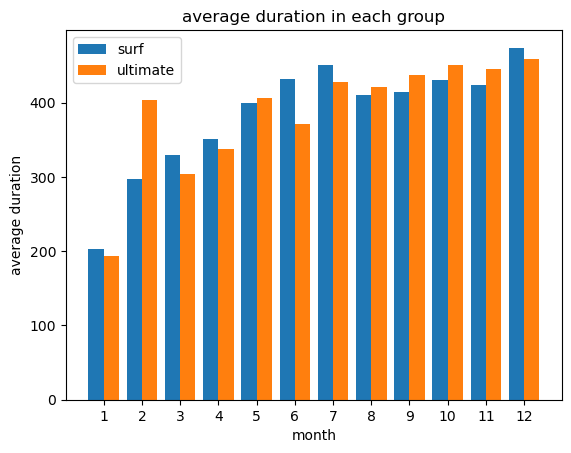

In [47]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
  
X = [1,2,3,4,5,6,7,8,9,10,11,12]
Ysurf = surf_duration_list
Zultimate = ultimate_duration_list
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ysurf, 0.4, label = 'surf')
plt.bar(X_axis + 0.2, Zultimate, 0.4, label = 'ultimate')
  
plt.xticks(X_axis, X)
plt.xlabel("month")
plt.ylabel("average duration")
plt.title("average duration in each group")
plt.legend()
plt.show()

**according to the plot, the average duration is the same more or less for both plan for all months ,but in month 2 we can see the average for ultimate is higher than surf**

first i will take only the users for the surf plans and take the mean then i will move to the other plan

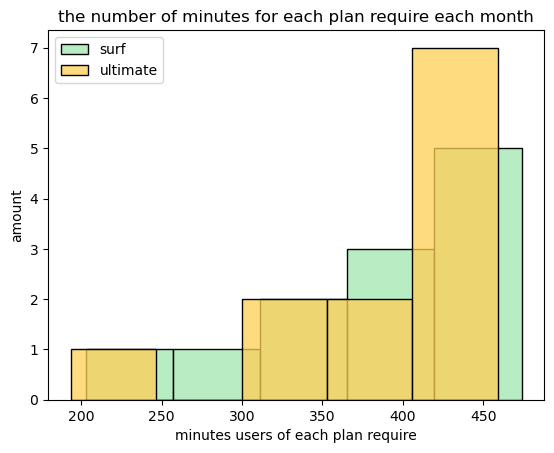

In [48]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
title = ['surf', 'ultimate']
sns.histplot(surf_duration,x='duration',color= '#A0E8AF')
sns.histplot(ultimate_duration,x='duration',color= '#FFCF56')
plt.title('the number of minutes for each plan require each month')
plt.xlabel('minutes users of each plan require')
plt.ylabel('amount')
plt.legend(('surf', 'ultimate'))

In [49]:
# Calculate the mean and the variance of the monthly call duration


mean_duration_ultimates = ultimate_duration.duration.mean()
print('mean:', mean_duration_ultimates)
variance_duration_ultimates =ultimate_duration.duration.var()
print('variance:', variance_duration_ultimates)
standard_deviation = np.sqrt(variance_duration_ultimates)
print('standard deviation:', standard_deviation)

mean: 387.99974229608006
variance: 5970.044622276386
standard deviation: 77.26606384614391


In [50]:
ultimate_duration.pivot_table(index= 'plan', values= 'duration', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,duration,duration,duration,duration
plan,,,,
ultimate,387.999742,5970.044622,77.266064,413.839


In [51]:
mean_duration_surf = surf_duration.duration.mean()
print('mean:', mean_duration_surf)
variance_duration_surf = surf_duration.duration.var()
print('variance:', variance_duration_surf)
standard_deviation_duration_surf = np.sqrt(variance_duration_surf)
print('standard deviation:', standard_deviation_duration_surf)

mean: 384.4696912581946
variance: 5857.69303844335
standard deviation: 76.53556714654533


In [52]:
surf_duration.pivot_table(index= 'plan', values= 'duration', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,duration,duration,duration,duration
plan,,,,
surf,384.469691,5857.693038,76.535567,412.168958


**the variance for duration column for ultimate plan is 5970.04 shows us how the values far from the mean, in addition the standard deviation is 77.26 that indicates data are more spread out, also for surf plan we have variance 5857.69 and standard deviation 76.53**

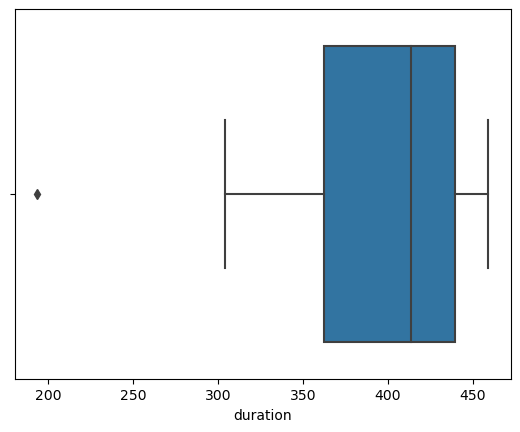

In [53]:
# Plot a boxplot to visualize the distribution of the monthly call duration

sns.boxplot(x = ultimate_duration['duration'])
plt.show()

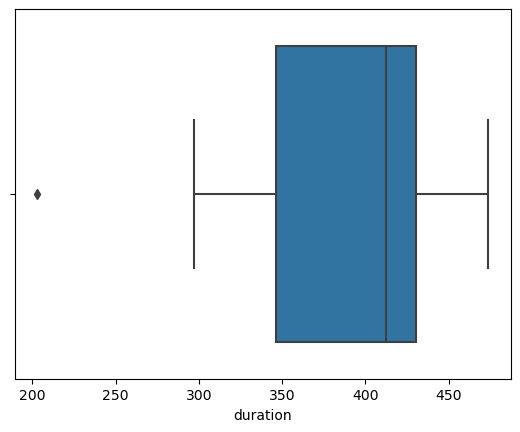

In [54]:
sns.boxplot(x=surf_duration['duration'])
plt.show()

### Messages

In [55]:
# Compare the number of messages users of each plan tend to send each month

surf_messages = df_users_by_month[df_users_by_month['plan'] == 'surf'].groupby(['month','plan'])['messages_number'].mean().reset_index()
surf_messages

,month,plan,messages_number
0,2018-01-01,surf,10.500000
1,2018-02-01,surf,12.000000
2,2018-03-01,surf,15.260870
3,2018-04-01,surf,17.400000
4,2018-05-01,surf,24.012987
5,2018-06-01,surf,25.298969
6,2018-07-01,surf,27.033058
7,2018-08-01,surf,28.777778
8,2018-09-01,surf,30.762887
9,2018-10-01,surf,33.839662


In [56]:
messages_number_surf_list =  list(surf_messages["messages_number"])
messages_number_surf_list

[10.5,
 12.0,
 15.26086956521739,
 17.4,
 24.01298701298701,
 25.298969072164947,
 27.03305785123967,
 28.77777777777778,
 30.762886597938145,
 33.83966244725738,
 32.38515901060071,
 38.600628930817614]

In [57]:
ultimate_messages = df_users_by_month[df_users_by_month['plan'] == 'ultimate'].groupby(['month','plan'])['messages_number'].mean().reset_index()


In [58]:
ultimate_messages.head()

,month,plan,messages_number
0,2018-01-01,ultimate,15.500000
1,2018-02-01,ultimate,21.571429
2,2018-03-01,ultimate,20.250000
3,2018-04-01,ultimate,22.047619
4,2018-05-01,ultimate,32.103448


In [59]:
messages_number_ultimate_list =  list(ultimate_messages["messages_number"])
messages_number_ultimate_list

[15.5,
 21.571428571428573,
 20.25,
 22.047619047619047,
 32.10344827586207,
 29.340425531914892,
 32.83050847457627,
 38.478873239436616,
 37.895348837209305,
 39.443396226415096,
 38.60629921259842,
 45.00662251655629]

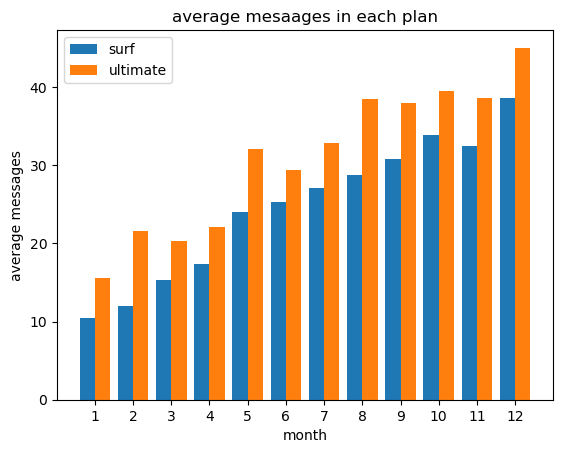

In [60]:
X = [1,2,3,4,5,6,7,8,9,10,11,12]
Ysurf = messages_number_surf_list
Zultimate = messages_number_ultimate_list
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ysurf, 0.4, label = 'surf')
plt.bar(X_axis + 0.2, Zultimate, 0.4, label = 'ultimate')
  
plt.xticks(X_axis, X)
plt.xlabel("month")
plt.ylabel("average messages")
plt.title("average mesaages in each plan")
plt.legend()
plt.show()

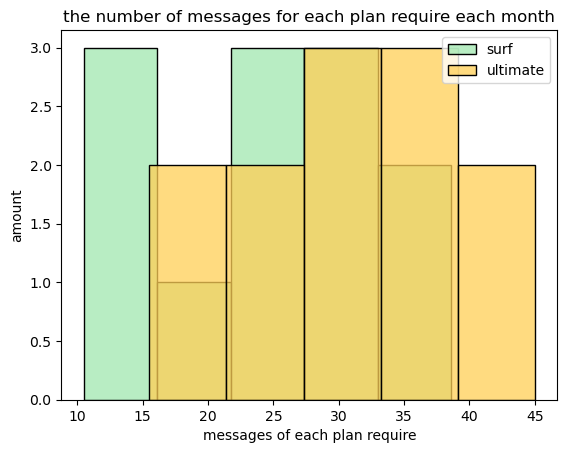

In [61]:
title = ['surf', 'ultimate']
sns.histplot(surf_messages,x='messages_number',color= '#A0E8AF')
sns.histplot(ultimate_messages,x='messages_number',color= '#FFCF56')
plt.title('the number of messages for each plan require each month')
plt.xlabel('messages of each plan require')
plt.ylabel('amount')
plt.legend(('surf', 'ultimate'))

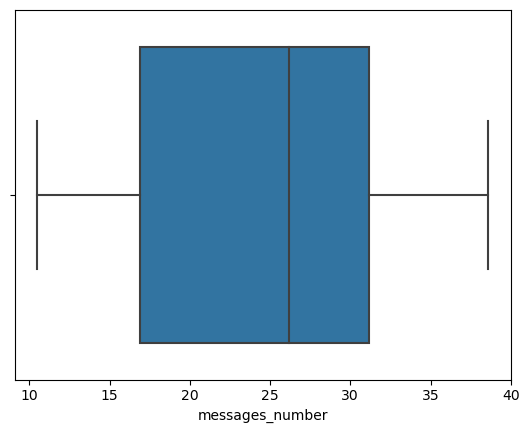

In [62]:
# Plot a boxplot to visualize the distribution of the monthly messages_number
sns.boxplot(x = surf_messages['messages_number'])
plt.show()

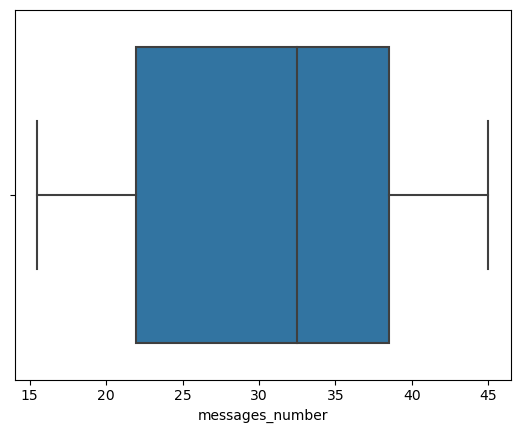

In [63]:
# Plot a boxplot to visualize the distribution of the monthly messages_number

sns.boxplot(x = ultimate_messages['messages_number'])
plt.show()

In [64]:
ultimate_messages.pivot_table(index= 'plan', values= 'messages_number', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,messages_number,messages_number,messages_number,messages_number
plan,,,,
ultimate,31.089497,87.353963,9.346334,32.466978


In [65]:
surf_messages.pivot_table(index= 'plan', values= 'messages_number', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,messages_number,messages_number,messages_number,messages_number
plan,,,,
surf,24.656,81.888846,9.049246,26.166013


**the variance for messages column for ultimate plan is 87.35 shows us how the values far from the mean, in addition the standard deviation is 9.34 that indicates data are more spread out, also for surf plan we have variance 81.88 and standard deviation 9.04**

### Internet

In [66]:
# Compare the amount of internet traffic consumed by users per plan

surf_internet = df_users_by_month[df_users_by_month['plan'] == 'surf'].groupby(['month','plan'])['mb_rounded_up'].mean().reset_index()

In [67]:
surf_internet.head()

,month,plan,mb_rounded_up
0,2018-01-01,surf,5000.000000
1,2018-02-01,surf,12222.222222
2,2018-03-01,surf,13565.217391
3,2018-04-01,surf,12220.000000
4,2018-05-01,surf,14116.883117


In [68]:
Internet_surf_list =  list(surf_internet["mb_rounded_up"])
Internet_surf_list

[5000.0,
 12222.222222222223,
 13565.217391304348,
 12220.0,
 14116.883116883117,
 15484.536082474227,
 16876.03305785124,
 16882.716049382718,
 16690.721649484534,
 17409.28270042194,
 16431.095406360426,
 18238.993710691822]

In [69]:
ultimate_internet = df_users_by_month[df_users_by_month['plan'] == 'ultimate'].groupby(['month','plan'])['mb_rounded_up'].mean().reset_index()


In [70]:
ultimate_internet.head()

,month,plan,mb_rounded_up
0,2018-01-01,ultimate,7250.000000
1,2018-02-01,ultimate,17285.714286
2,2018-03-01,ultimate,18416.666667
3,2018-04-01,ultimate,16333.333333
4,2018-05-01,ultimate,16862.068966


In [71]:
Internet_ultimate_list =  list(ultimate_internet["mb_rounded_up"])
Internet_ultimate_list

[7250.0,
 17285.714285714286,
 18416.666666666668,
 16333.333333333334,
 16862.068965517243,
 15425.531914893618,
 16491.525423728814,
 17845.070422535213,
 17011.627906976744,
 17716.98113207547,
 17118.110236220473,
 18397.350993377484]

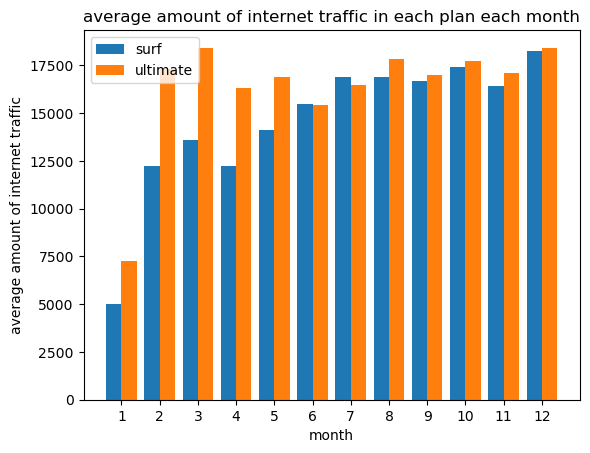

In [72]:
X = [1,2,3,4,5,6,7,8,9,10,11,12]
Ysurf = Internet_surf_list
Zultimate = Internet_ultimate_list
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ysurf, 0.4, label = 'surf')
plt.bar(X_axis + 0.2, Zultimate, 0.4, label = 'ultimate')
  
plt.xticks(X_axis, X)
plt.xlabel("month")
plt.ylabel("average amount of internet traffic")
plt.title("average amount of internet traffic in each plan each month")
plt.legend()
plt.show()

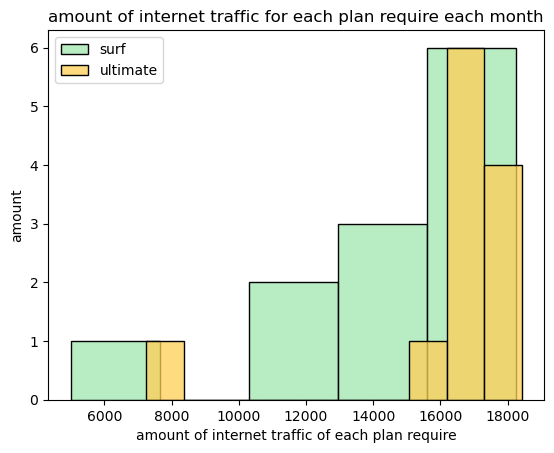

In [73]:
title = ['surf', 'ultimate']
sns.histplot(surf_internet,x='mb_rounded_up',color= '#A0E8AF')
sns.histplot(ultimate_internet,x='mb_rounded_up',color= '#FFCF56')
plt.title('amount of internet traffic for each plan require each month')
plt.xlabel('amount of internet traffic of each plan require')
plt.ylabel('amount')
plt.legend(('surf', 'ultimate'))

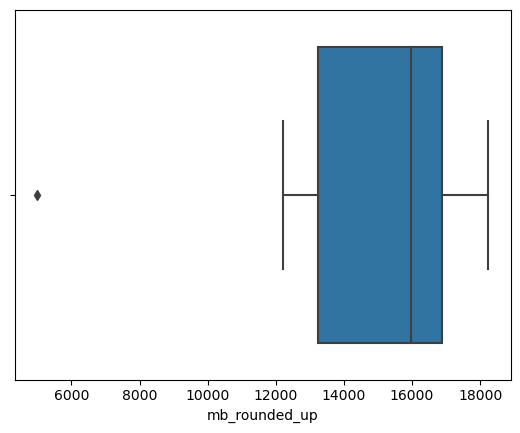

In [74]:
# Plot a boxplot to visualize the distribution of the monthly messages_number
sns.boxplot(x = surf_internet['mb_rounded_up'])
plt.show()

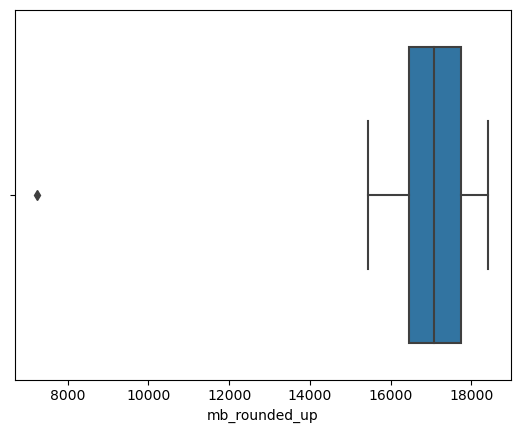

In [75]:
sns.boxplot(x = ultimate_internet['mb_rounded_up'])
plt.show()

In [76]:
ultimate_internet.pivot_table(index= 'plan', values= 'mb_rounded_up', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,mb_rounded_up,mb_rounded_up,mb_rounded_up,mb_rounded_up
plan,,,,
ultimate,16346.165107,8.946993e+06,2991.152451,17064.869072


In [77]:
surf_internet.pivot_table(index= 'plan', values= 'mb_rounded_up', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,mb_rounded_up,mb_rounded_up,mb_rounded_up,mb_rounded_up
plan,,,,
surf,14594.808449,1.316491e+07,3628.34768,15957.815744


**the variance for mb_rounded_up column for ultimate plan is 9663687.39 shows us how the values far from the mean, in addition the standard deviation is 3108.64 that indicates data are more spread out, also for surf plan we have variance 13921146.28 and standard deviation 3731.105**

## Revenue

## Revenue from users of Ultimate and Surf calling plans differs

In [78]:
surf=df_users_by_month[df_users_by_month['plan'] == 'surf']
surf.head(2)

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
1,1001,2018-08-01,182.0,30.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0
2,1001,2018-09-01,315.0,44.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.0


In [79]:
surf['total_cost'].describe()

count    1573.000000
mean       56.356942
std        53.312647
min        16.820000
25%        20.000000
50%        36.400000
75%        76.400000
max       564.120000
Name: total_cost, dtype: float64

In [80]:
surf.loc[:,"total_cost"].var()

2842.2382989769517

In [81]:
ultimate=df_users_by_month[df_users_by_month['plan'] == 'ultimate']
ultimate.head(2)

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
0,1000,2018-12-01,124.0,11.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.0
19,1006,2018-11-01,10.0,15.0,2068.37,3000.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,70.0


In [82]:
ultimate['total_cost'].describe()

count    720.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: total_cost, dtype: float64

In [83]:
ultimate.loc[:,"total_cost"].var()

0.0

**the variance for total_cost column for ultimate plan is 0 shows us there is no difference in the data values, in addition the standard deviation is 0 that indicates that data points are close to the mean , but for surf plan we have variance 3064.52 and standard deviation 55.35 that mean data are more spread out**

## Revenue from users in NY-NJ area 

In [84]:
df_users_by_month['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          377
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
El Paso, TX MSA                                      2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [85]:

ny_nj = df_users_by_month[df_users_by_month['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
ny_nj.head()

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
56,1014,2018-11-01,163.0,9.0,1175.59,2000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,20.00
57,1014,2018-12-01,1114.0,64.0,7792.41,8000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,19.58
75,1022,2018-05-01,302.0,0.0,4908.08,5000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,20.00
76,1022,2018-06-01,490.0,0.0,23436.48,23000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,96.40
77,1022,2018-07-01,475.0,0.0,9933.15,10000.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,20.00


In [86]:
ny_nj.pivot_table(index= 'city', values= 'total_cost', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,total_cost,total_cost,total_cost,total_cost
city,,,,
"New York-Newark-Jersey City, NY-NJ-PA MSA",55.842281,1718.682846,41.457,46.4


In [87]:
other_cities = df_users_by_month[df_users_by_month.city != 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_cities.head()

,user_id,month,duration,messages_number,mb_used,mb_rounded_up,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
0,1000,2018-12-01,124.0,11.0,1901.47,2000.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,2018-08-01,182.0,30.0,6919.15,7000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
2,1001,2018-09-01,315.0,44.0,13314.82,14000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,20.00
3,1001,2018-10-01,393.0,53.0,22330.49,22000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,86.31
4,1001,2018-11-01,426.0,36.0,18504.30,19000.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,56.40


In [88]:
other_cities.pivot_table(index= 'city', values= 'total_cost', aggfunc= ['mean', 'var','std', 'median'])

,mean,var,std,median
,total_cost,total_cost,total_cost,total_cost
city,,,,
"Albany-Schenectady-Troy, NY MSA",141.344000,2921.639380,54.052191,154.96
"Albuquerque, NM MSA",64.057143,925.313407,30.418965,66.40
"Atlanta-Sandy Springs-Roswell, GA MSA",72.332766,801.015681,28.302220,70.00
"Austin-Round Rock-Georgetown, TX MSA",52.370000,1258.970652,35.481976,36.40
"Bakersfield, CA MSA",46.950000,749.345714,27.374180,46.40
...,...,...,...,...
"Tucson, AZ MSA",65.000000,250.000000,15.811388,70.00
"Tulsa, OK MSA",70.276667,1750.629275,41.840522,66.10


In [89]:
mean_other_cities = other_cities.total_cost.mean()
print('mean:',mean_other_cities)
variance_other_cities =other_cities.total_cost.var()
print('variance:', variance_other_cities)
standard_deviation = np.sqrt(variance_other_cities)
print('standard deviation:', standard_deviation)

mean: 61.58503653444629
variance: 2038.2871044894946
standard deviation: 45.14739310845638


**the variance for total_cost in ny_nj data for is 1857.24 shows us how the values far from the mean, in addition the standard deviation is 43.09 that indicates data are more spread out, also for other_cities in total_cost we have variance 2176.93 and standard deviation 46.6**

## Test statistical hypotheses

**Our test :<br>
the average revenue from users of the Ultimate and Surf calling plans equal <br>
the t_test assume that the average for 2 sample is equal, so we will take H0:average total_cost for the two plans are equal**

In [90]:
sample1=surf['total_cost']
sample2=ultimate['total_cost']

In [91]:
sample1.head()

1    20.00
2    20.00
3    86.31
4    56.40
5    56.40
Name: total_cost, dtype: float64

In [92]:
# Test the hypotheses
stats.ttest_ind(sample1,sample2)


C:\Users\Alar\AppData\Local\Temp\ipykernel_22716\4065909694.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(sample1,sample2)


Ttest_indResult(statistic=-6.865881965153146, pvalue=8.479189793728276e-12)

In [93]:
stats.ttest_ind(sample1, sample2).pvalue

C:\Users\Alar\AppData\Local\Temp\ipykernel_22716\546310753.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(sample1, sample2).pvalue


8.479189793728276e-12

In [94]:
alpha=0.05
if stats.ttest_ind(sample1, sample2).pvalue<alpha:
    print('We reject H0: average tota_cost for the two plans are not equal ')
else:
    print('fail to reject H0: we dont have enough evidence to say that averages of sample 1 and sample 2 are not the same')

We reject H0: average tota_cost for the two plans are not equal 


C:\Users\Alar\AppData\Local\Temp\ipykernel_22716\1046886112.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if stats.ttest_ind(sample1, sample2).pvalue<alpha:


***the t-test shows if the average revenue from users of the Ultimate and Surf is equal or not . The p-value tells us that although the average total_cost for the two plans are not equal***

**Our test :<br>
that the average revenue from users in the NY-NJ area is equal from that of the users from the other regions<br>
the t_test assume that the average for 2 sample is equal, so we will take H0:average total_cost for the two samples are equal**

In [95]:
sample3=ny_nj['total_cost']
sample4=other_cities['total_cost']

In [96]:
sample3.head()

56    20.00
57    19.58
75    20.00
76    96.40
77    20.00
Name: total_cost, dtype: float64

In [97]:
# Test the hypotheses
stats.ttest_ind(sample3,sample4)


Ttest_indResult(statistic=-2.287258761151103, pvalue=0.022271508914453137)

In [98]:
stats.ttest_ind(sample3, sample4).pvalue


0.022271508914453137

In [99]:
alpha=0.05
if stats.ttest_ind(sample3, sample4).pvalue<alpha:
    print('We reject H0: average amounts for the two plans are not equal')
else:
    print('fail to reject H0: we dont have enough evidence to say that averages of sample 3 and sample 4 are not the same')

We reject H0: average amounts for the two plans are not equal


## General conclusion

**Findings<br>
We have tested the following two hypotheses :<br>
first hypotheses:<br>
the average revenue from users of the Ultimate and Surf calling plans equal<br>
We reject H0: average total_cost for the two plans are not equal.<br>**

**we can see that the customer tend to exceeding the package limits and pay more extra charges,Despite this, still the ultimate more profitable for the company<br>**

**second hypotheses:<br>
the average revenue from users in the NY-NJ area and users from the other regions are not equal
We reject H0: average amounts for the two plans are not equal<br>**